<a href="https://colab.research.google.com/github/shaddy2911/My-Functions-and-Classes/blob/main/my_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Neural Networks from scratch**

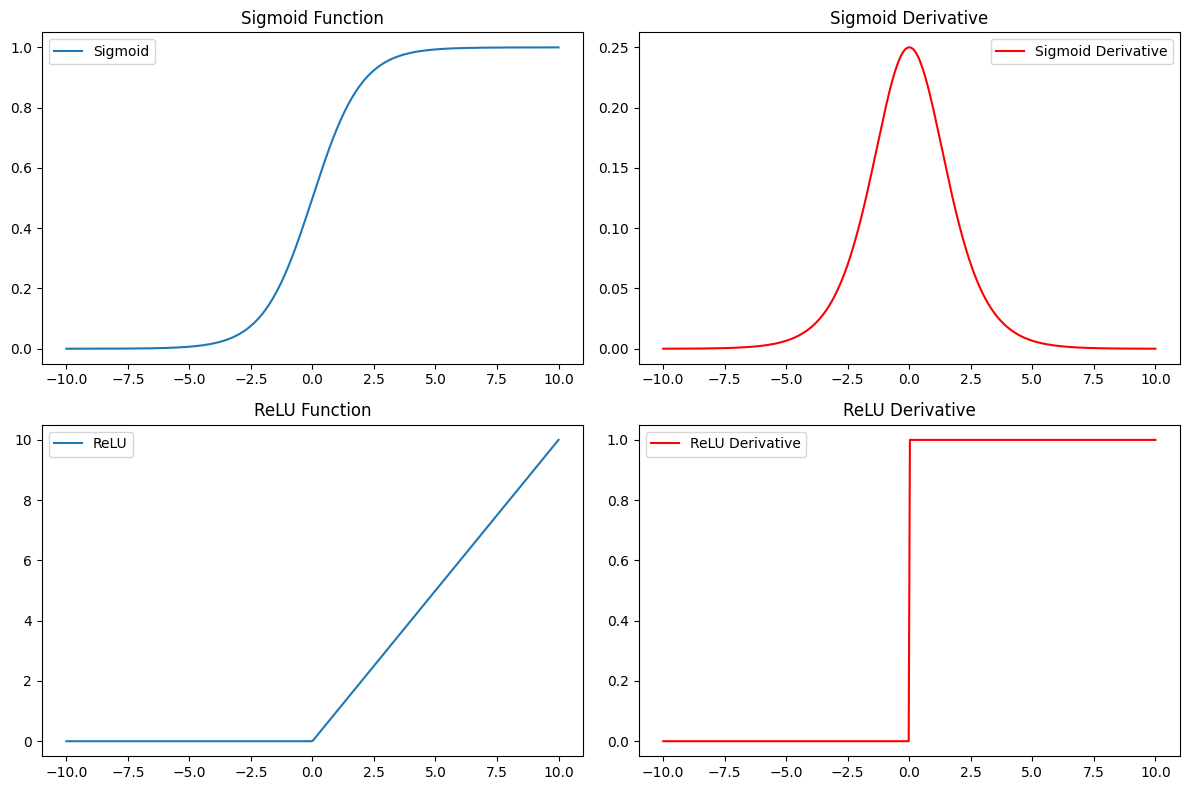

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

# Define activation functions and their derivatives
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_p(x):
    return sigmoid(x) * (1 - sigmoid(x))

def relu(x):
    return np.maximum(x, 0)

def relu_p(x):
    return np.heaviside(x, 0)

# Generate values
x = np.linspace(-10, 10, 400)

# Calculate function values and derivatives
sigmoid_vals = sigmoid(x)
sigmoid_deriv_vals = sigmoid_p(x)
relu_vals = relu(x)
relu_deriv_vals = relu_p(x)

# Print values to debug
# print("Sigmoid values:", sigmoid_vals)
# print("Sigmoid derivative values:", sigmoid_deriv_vals)
# print("ReLU values:", relu_vals)
# print("ReLU derivative values:", relu_deriv_vals)

# Check if relu_vals or relu_deriv_vals are None
if relu_vals is None or relu_deriv_vals is None:
    print("Error: relu_vals or relu_deriv_vals are None")
else:
    # Plotting
    plt.figure(figsize=(12, 8))

    # Sigmoid and its derivative
    plt.subplot(2, 2, 1)
    plt.plot(x, sigmoid_vals, label='Sigmoid')
    plt.title('Sigmoid Function')
    plt.legend()

    plt.subplot(2, 2, 2)
    plt.plot(x, sigmoid_deriv_vals, label='Sigmoid Derivative', color='r')
    plt.title('Sigmoid Derivative')
    plt.legend()

    # ReLU and its derivative
    plt.subplot(2, 2, 3)
    plt.plot(x, relu_vals, label='ReLU')
    plt.title('ReLU Function')
    plt.legend()

    plt.subplot(2, 2, 4)
    plt.plot(x, relu_deriv_vals, label='ReLU Derivative', color='r')
    plt.title('ReLU Derivative')
    plt.legend()

    plt.tight_layout()
    plt.show()


# Loss function

In [ ]:
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def mean_squared_error_p(y_true, y_pred):
    return y_pred - y_true


## Initialize parameters

In [ ]:
def initialize_parameters(layers):
    parameters = {}
    for l in range(1, len(layers)):
        parameters[f"W{l}"] = np.random.randn(layers[l], layers[l-1]) * 0.01
        parameters[f"b{l}"] = np.zeros((layers[l], 1))
    return parameters


# Forward Propagation

In [ ]:
def f_propagation(X, parameters, activation_funcs):
    cache = {"A0": X}
    L = len(parameters) // 2

    for l in range(1, L + 1):
        W = parameters[f"W{l}"]
        b = parameters[f"b{l}"]
        A_prev = cache[f"A{l-1}"]
        Z = np.dot(W, A_prev) + b
        A = activation_funcs[l-1](Z)
        cache[f"Z{l}"] = Z
        cache[f"A{l}"] = A

    return A, cache


# Backward Propagation

In [ ]:
def b_propagation(y_true, parameters, cache, activation_derivs):
    gradients = {}
    L = len(parameters) // 2
    m = y_true.shape[1]

    A_final = cache[f"A{L}"]
    dA_final = mean_squared_error_p(y_true, A_final)
    dZ_final = dA_final * activation_derivs[L-1](cache[f"Z{L}"])

    for l in reversed(range(1, L + 1)):
        A_prev = cache[f"A{l-1}"]
        dW = (1 / m) * np.dot(dZ_final, A_prev.T)
        db = (1 / m) * np.sum(dZ_final, axis=1, keepdims=True)
        gradients[f"dW{l}"] = dW
        gradients[f"db{l}"] = db

        if l > 1:
            W = parameters[f"W{l}"]
            dA_prev = np.dot(W.T, dZ_final)
            dZ_final = dA_prev * activation_derivs[l-2](cache[f"Z{l-1}"])

    return gradients


# Update Parameters

In [ ]:
def update_parameters(parameters, gradients, learning_rate):
    L = len(parameters) // 2

    for l in range(1, L + 1):
        parameters[f"W{l}"] -= learning_rate * gradients[f"dW{l}"]
        parameters[f"b{l}"] -= learning_rate * gradients[f"db{l}"]

    return parameters


# Training the Neural Network

In [ ]:
def train_neural_network(X, y, layers, activation_funcs, activation_derivs, learning_rate=0.01, epochs=1000):
    parameters = initialize_parameters(layers)

    for epoch in range(epochs):
        # Forward propagation
        y_pred, cache = f_propagation(X, parameters, activation_funcs)

        # Compute loss
        loss = mean_squared_error(y, y_pred)

        # Backward propagation
        gradients = b_propagation(y, parameters, cache, activation_derivs)

        # Update parameters
        parameters = update_parameters(parameters, gradients, learning_rate)

        # Print loss every 100 epochs
        if epoch % 100 == 0:
            print(f"Epoch {epoch} - Loss: {loss}")

    return parameters


# Test Neural networks

In [ ]:
# Generate synthetic data for demonstration
np.random.seed(42)
X = np.random.rand(2, 500)  # 2 features, 500 samples
y = (np.sum(X, axis=0) > 1).astype(int).reshape(1, -1)  # Simple linear boundary for classification

# network architecture
layers = [2, 4, 1]  # 2 input features, 4 hidden units, 1 output
activation_funcs = [relu, sigmoid]
activation_derivs = [relu_p, sigmoid_p]

# Training the neural network
parameters = train_neural_network(X, y, layers, activation_funcs, activation_derivs, learning_rate=0.01, epochs=1000)

# Making predictions
y_pred, _ = f_propagation(X, parameters, activation_funcs)
y_pred = (y_pred > 0.5).astype(int)

# Calculate accuracy
accuracy = np.mean(y_pred == y)
print(f"Training accuracy: {accuracy * 100:.2f}%")


Epoch 0 - Loss: 0.25000258325750974
Epoch 100 - Loss: 0.24997870798371888
Epoch 200 - Loss: 0.24995752781796657
Epoch 300 - Loss: 0.2499387240154061
Epoch 400 - Loss: 0.24992201482723403
Epoch 500 - Loss: 0.2499071511538055
Epoch 600 - Loss: 0.24989391271288308
Epoch 700 - Loss: 0.2498821046620123
Epoch 800 - Loss: 0.24987155459829416
Epoch 900 - Loss: 0.24986210991367624
Training accuracy: 51.40%
